In [233]:
import polars as pl
import numpy as np
bio = pl.read_csv("lahman_people.csv")
pbp = pl.read_csv("savant_data_2021_2023.csv")
pbp

pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,zone,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,sv_id,vx0,vy0,…,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,role_key,sp_indicator,rp_indicator,pitch_number_appearance,pitcher_at_bat_number,times_faced
str,str,f64,f64,f64,str,str,str,str,i64,str,str,str,str,str,str,i64,str,i64,i64,i64,f64,f64,f64,f64,str,str,str,i64,i64,str,f64,f64,str,str,f64,f64,…,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,f64,str,i64,i64,i64,i64,i64
"""FF""","""2021-04-05""",93.2,0.84,5.74,"""c7c83eaa9fe8da2f81c5fce172059a…","""4f902241478a103f7a818f5be9a7b7…","""strikeout""","""swinging_strike""",13,"""R""","""L""","""L""","""e58e9c0fd276f0c175345b6d952a9e…","""ae2caea4bb1f46b714e35f0176994f…","""S""",2,null,3,2,2021,0.43,1.57,-0.05,1.41,null,null,null,2,6,"""Bot""",null,null,"""55bd3201fa7465188c2c70169f2e94…",null,-3.263176,-135.5206,…,"""c04bfbc3f42ec36472468471b3a716…","""7694076619c298b4556297b20afaf8…","""17cbce1de7a9d4e31952e86ba69ced…","""b135b247f1afd053b201fc7c434493…","""fa9c99ce9acb5fd5971e8fb834d745…","""53dfe414229803162d14787d30fbf4…","""9b52235d7b694738421b6c2ed9271e…",53.47,null,null,0.0,1,0,0,null,47,7,"""4-Seam Fastball""",0,2,0,2,2,0,0,2,"""Infield shift""","""Standard""",166,-0.014,-0.134,"""SP""",1,0,97,22,3
"""SL""","""2021-04-05""",82.9,1.03,5.69,"""c7c83eaa9fe8da2f81c5fce172059a…","""4f902241478a103f7a818f5be9a7b7…",null,"""foul""",5,"""R""","""L""","""L""","""e58e9c0fd276f0c175345b6d952a9e…","""ae2caea4bb1f46b714e35f0176994f…","""S""",null,null,3,2,2021,-0.42,-0.34,0.09,2.24,null,null,null,2,6,"""Bot""",null,null,"""55bd3201fa7465188c2c70169f2e94…",null,-1.343797,-120.739091,…,"""c04bfbc3f42ec36472468471b3a716…","""7694076619c298b4556297b20afaf8…","""17cbce1de7a9d4e31952e86ba69ced…","""b135b247f1afd053b201fc7c434493…","""fa9c99ce9acb5fd5971e8fb834d745…","""53dfe414229803162d14787d30fbf4…","""9b52235d7b694738421b6c2ed9271e…",53.66,null,null,null,null,null,null,null,47,6,"""Slider""",0,2,0,2,2,0,0,2,"""Infield shift""","""Standard""",309,0.0,0.0,"""SP""",1,0,96,22,3
"""FF""","""2021-04-05""",94.6,-1.85,5.77,"""514eeb6e6c17085fc1adabf03f1adc…","""afb9b85defc6fe5c3f48681480eff4…","""caught_stealing_3b""","""ball""",14,"""R""","""R""","""R""","""3c4ec083bb4b200556718068a3cea7…","""284da2e9c8943a9faa155f56f0faaa…","""B""",2,null,2,2,2021,-0.56,1.53,2.01,1.92,null,"""c8f1ff43c331519aab03daab36b84b…",null,2,4,"""Top""",null,null,"""3103eeddc91e18c223c7ef4d3c12f2…",null,11.292119,-137.173707,…,"""a9b53974ac34cd7c03133051645ef4…","""c3b12c33078b6ce2f0c8287913cd68…","""88a241e142df6a547f9188eb81f5c2…","""c1efd3145c820257fae2347ff56758…","""4f6c643961e8df8f6d76d136b13ba2…","""a7ab335ba29a72bc194f77b694f23b…","""ccbeebb83e2f368d70aca48df9d3ca…",54.12,null,null,0.0,0,0,0,null,28,6,"""4-Seam Fastball""",0,4,4,0,4,0,4,0,"""Standard""","""Standard""",220,0.014,-0.202,"""SP""",1,0,95,19,3
"""FF""","""2021-04-05""",97.1,1.86,6.57,"""875eeca87c6f80182a88c2a7b92c04…","""0f061b9439845159c394a71e55d635…","""field_out""","""hit_into_play""",13,"""R""","""R""","""L""","""8499d67c7ea3ce9671a0574ff23364…","""febb17c5596d048b6a6a4eea23cfe0…","""X""",7,"""line_drive""",3,2,2021,0.75,1.56,-0.84,2.21,null,null,"""29df9634e71f12ec4754b370e647db…",2,5,"""Bot""",90.32,88.66,"""c4db34402ba417ae6cc0cf8eca1c05…",null,-8.928735,-140.780154,…,"""80f3a94c7bf1ed6397

In [234]:
def get_counts(data, type):#janky way to do this?
    """
    Gets count of playing time
    data - df of interest
    type - whether batter or pitcher
    """
    return (data
            .group_by(type,'game_pk', 'at_bat_number', 'game_year')
            .len().group_by(type, 'game_year').len()
            .rename({"len":"PA"}).pivot('game_year', index = type, values = 'PA'))
batterAB = pbp.pipe(get_counts, 'batter').select("batter", "2021", "2022", "2023")
pitcherBF = pbp.pipe(get_counts, 'pitcher').select("pitcher", "2021", "2022", "2023")
batterAB

batter,2021,2022,2023
str,u32,u32,u32
"""156a23a4cc56796a03b911ca8f66a2…",16,null,null
"""ebfdfcefeaa4148ec27eca02f529b8…",369,408,126
"""f520169b688bef43a04467c83c7059…",617,488,257
"""8e279ef4dafa65d4db8b0d74ae3db9…",73,72,408
"""65a1c03b9820fabdf8eb47890a8ea7…",null,14,87
…,…,…,…
"""8fcaf91f08e35e99da1f6a7c5608b7…",null,null,64
"""09bcad48d0185d5c1cd04957300dc4…",null,null,601
"""fc93f83452c14d80e82c2c8a7f39f9…",4,null,null


In [235]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import root_mean_squared_error
#running linear regression of past 2 seasons to apply to 2023 - about as good as expected(pretty bad)
def test_model_sklearn(model, data, x, y):
    X_train, X_test, y_train, y_test = train_test_split(data.select(x), data.select(y), test_size = 0.25, random_state = 42) 
    #use random_state=42!!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    return root_mean_squared_error(y_pred, y_test)
test_model_sklearn(LinearRegression(), batterAB.fill_null(0), ['2022', '2021'], ['2023']), test_model_sklearn(LinearRegression(), pitcherBF.fill_null(0), ['2022', '2021'], ['2023'])
#similar to averaging method - expected due to nature of MLR 
#baseline to beat: batter: 130.2384341194738, pitcher: 145.577135969748

(123.10367310971071, 142.16499618015527)

In [236]:
def get_means(data):
    #using average of 2022, 2021 data to estimate 2023 data
    return (data.with_columns(pl.mean_horizontal(['2022', '2021'])
                                    .alias('row_mean')).fill_null(0)
                                    .select(['2023', 'row_mean']))
batter_test, batter_mean = batterAB.pipe(get_means)
pitcher_test, pitcher_mean = pitcherBF.pipe(get_means)
root_mean_squared_error(batter_test, batter_mean), root_mean_squared_error(pitcher_test, pitcher_mean)
#mean method: 178.68480531577185, 175.54575174805603 - about same as MLR method

(147.7921639050094, 168.31630176648687)

In [237]:
#need to predict nulls - looking at MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
def imputeData(estimator, batterdf, pitcherdf, max_iter = 200, random_state = 42):
    imputer = IterativeImputer(estimator = estimator, max_iter=max_iter, random_state=random_state)
    batterABimputed = (pl.DataFrame(imputer.fit_transform(
        batterdf.select("2023", "2022", "2021")), schema = ["2023", "2022", "2021"]).with_columns(
            batter = batterAB.get_column("batter")
    ))
    pitcherBFimputed = (pl.DataFrame(imputer.fit_transform(
        pitcherdf.select("2023", "2022", "2021")), schema = ["2023", "2022", "2021"]).with_columns(
            pitcher = pitcherBF.get_column("pitcher")
    ))
    return batterABimputed, pitcherBFimputed
batterimp, pitcherimp = imputeData(BayesianRidge(), batterAB, pitcherBF)#Bayesian Seems Best - actually converges
#batterimp, pitcherimp = imputeData(DecisionTreeRegressor(), batterAB, pitcherBF, max_iter = 2000)
#batterimp, pitcherimp = imputeData(KNeighborsRegressor(), batterAB, pitcherBF, max_iter = 2000)
test_model_sklearn(LinearRegression(), batterimp, ['2022', '2021'], ['2023']), test_model_sklearn(LinearRegression(), pitcherimp, ['2022', '2021'], ['2023'])
#MLR with imputation yields - batter: 108.16645006899171, pitcher: 104.5259354514329
#imputation seems better than just filling with 0


(100.98202750256291, 106.70568953240162)

In [238]:
import datetime
import polars_xdt as xdt
bio
#months in league to standardize? vs. age
openingMonths = {
    year : datetime.date(year, 10, 1) for year in range(2021, 2024)
}
bio = (
    bio
    .lazy()
    .with_columns(
        pl.col("birthDate").str.to_date("%Y-%m-%d").alias("birthDT"),
        pl.col("debut").str.to_date("%Y-%m-%d").alias("debutDT"),
        
    )
    .collect()
)
def monthDelta(start, end):
    return (pl.date_ranges(start, end,'1mo',closed='right')).list.len()
monthdata = (
    bio
    .with_columns(
        monthDelta(pl.col("birthDT"),openingMonths[2021]).alias("Age2021"),
        monthDelta(pl.col("birthDT"),openingMonths[2022]).alias("Age2022"),
        monthDelta(pl.col("birthDT"),openingMonths[2023]).alias("Age2023"),
        monthDelta(pl.col("debutDT"),openingMonths[2021]).alias("TIL2021"),
        monthDelta(pl.col("debutDT"),openingMonths[2022]).alias("TIL2022"),
        monthDelta(pl.col("debutDT"),openingMonths[2023]).alias("TIL2023"),
    ) 
).select("player_mlb_id", "playerID_LAHMAN", pl.col("^[Age | TIL].*$"))
#openingMonths
monthdata

player_mlb_id,playerID_LAHMAN,Age2021,Age2022,Age2023,TIL2021,TIL2022,TIL2023
str,str,u32,u32,u32,u32,u32,u32
"""0629cd765e77d52b8a43cb56621c82…","""146ae8ecba2a3af909b0814df68b5d…",429,441,453,134,146,158
"""33438ca2fdf93ff73b2e1bcc5da305…","""543bb62c4bdd4911df4bd1a2313a97…",312,324,336,3,15,27
"""f79cf1f3d100e5f34d86ce2cd4c8c3…","""e195c4bc19cb6a08203e3c9e361677…",251,263,275,0,5,17
null,"""7265712e9970a0afa6ad8214b74253…",312,324,336,13,25,37
"""3d65b1ac983ce90ff1f21f56b62788…","""0029980d1ad27d254bc1f60e31a32f…",293,305,317,26,38,50
…,…,…,…,…,…,…,…
"""fb700ef074fe19c9c4328e120dd91c…","""a5c53be1f59100143df6f70f01d850…",298,310,322,0,0,0
"""0cb4ea486038c8edcb71036139fcef…","""d05f17e03fd8f465d6b97ea2b98858…",260,272,284,0,0,0
"""128f3d8f2092540735e1a741529518…","""a504d79a7e6fcabd6edf101e0e4b45…",263,275,287,0,0,0


In [284]:
#this is a silly way to do this...
batterzeros = batterAB.fill_null(0)
pitcherzeros = pitcherBF.fill_null(0)
batterData = batterzeros.join(monthdata, left_on = "batter", right_on = "player_mlb_id")
pitcherData = pitcherzeros.join(monthdata, left_on = "pitcher", right_on = "player_mlb_id")
def convertTimeSeries(data, type):
    PlayingTime = pl.concat(
        [
            data.get_column('2021'),
            data.get_column('2022'),
            data.get_column('2023')
        ],
        how='vertical'
    )
    age = pl.concat(
        [
            data.get_column('Age2021'),
            data.get_column('Age2022'),
            data.get_column('Age2023')
        ],
        how='vertical'
    )

    experience = pl.concat(
        [
            data.get_column('TIL2021'),
            data.get_column('TIL2022'),
            data.get_column('TIL2023')
        ],
        how='vertical'
    )
    season = pl.concat(
        [
            pl.Series([2021] * int(experience.len() / 3)).alias("year"),
            pl.Series([2022] * int(experience.len() / 3)),
            pl.Series([2023] * int(experience.len() / 3)),
        ],
        how = 'vertical'
    )
    players = pl.concat(
        [
            data.get_column(type),
            data.get_column(type),
            data.get_column(type)
        ],
        how='vertical'
    )
    timeseries = pl.DataFrame([players, season, age, experience, PlayingTime]).rename({"Age2021": "Age", "TIL2021": "TIL", "2021": "PlayingTime"})
    return timeseries
pitcherTS = convertTimeSeries(pitcherData, "pitcher")
batterTS = convertTimeSeries(batterData, "batter")

In [319]:
wobas = (pbp.filter(pl.col("woba_value").is_not_null())
 .group_by("batter", "game_year")
 .mean().select("batter", "game_year", "estimated_woba_using_speedangle")).with_columns(
     (pl.col("game_year") + 1).alias("next_year")
 ).rename({"estimated_woba_using_speedangle": "seasonWOBA"})
wobas

batter,game_year,seasonWOBA,next_year
str,i64,f64,i64
"""730c8c933b8f6f4425534e371b1572…",2021,0.366677,2022
"""4be0e45ba7969bcad788c1410dec53…",2021,0.044,2022
"""96174218b30a843dc7df8cc053890b…",2021,0.383,2022
"""56c38efc936ad92da986834cbca52c…",2021,0.098,2022
"""592cfcba5200ba0171d471b3cceb6f…",2022,0.296661,2023
…,…,…,…
"""da8a78b0aba1c6f1d9092a69851a8c…",2022,0.244642,2023
"""cb0945d75bacbce335c5bad0d0e838…",2023,0.387211,2024
"""678119a88d780a54011377d88f13bd…",2021,0.257667,2022


In [320]:
nextyearWOBA = batterTS.join(wobas, left_on = ["batter","year"], right_on = ["batter", "next_year"])
currentWOBA = batterTS.join(wobas, left_on = ["batter","year"], right_on = ["batter", "game_year"])


In [327]:
currentWOBA.filter(pl.col("seasonWOBA") > 0.8)
#will need to regress these to the mean - wobas are hella inflated - future work

batter,year,Age,TIL,PlayingTime,seasonWOBA,next_year
str,i64,u32,u32,u32,f64,i64
"""83902f320532a76b56367b2d4c62ff…",2021,435,148,1,0.803,2022
"""231d573a7f3607f76f16eb294509c7…",2021,346,3,3,1.547,2022
"""8b04fa5301010f7ed5a77b2a440de2…",2021,304,36,2,0.898,2022
"""edcdf6c249486f992de4eab95e4ec8…",2021,303,5,2,0.831,2022
"""68724fd1e0154ad957dcb97fdab47e…",2021,304,27,2,0.842,2022
"""498c36f21c2027fb1b011e37d66c4e…",2022,291,16,2,0.911,2023
"""62a2486a848779c531c907ef6a6214…",2022,350,0,4,0.829,2023
"""1ccfa4a1ec1b4a6fca216a1e270f61…",2023,328,27,2,0.92,2024


<Axes: xlabel='TIL', ylabel='PlayingTime'>

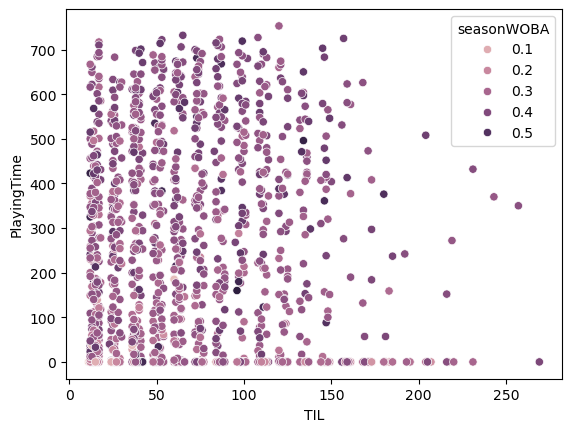

In [313]:
import seaborn as sns
sns.scatterplot(x="TIL", y="PlayingTime", hue = "seasonWOBA", data = withWobas.filter(pl.col("seasonWOBA") < 0.6))